In [45]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from src.utils.mining_data_tb import *
from src.utils.vizualitation_tb import *

In [2]:
df = pd.read_csv('../data/phl_exoplanet_catalog.csv')

In [9]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,P_FLUX,P_ESI,S_DISTANCE,S_MASS,S_RADIUS_EST,S_LUMINOSITY,S_CONSTELLATION
0,11 Com b,3.0,6165.86330,NaN,326.03000,0.231,101.011410,0.083813,93.37,2.70,19.00,163.546800,Coma Berenices
1,11 UMi b,3.0,4684.78480,NaN,516.21997,0.080,107.351180,0.082414,125.72,2.78,29.79,250.492940,Ursa Minor
2,14 And b,3.0,1525.57440,NaN,185.84000,0.000,84.446427,0.081917,75.59,2.20,11.00,58.175144,Andromeda
3,14 Her b,3.0,1481.07850,NaN,1773.40000,0.370,0.078887,0.145241,17.94,0.90,0.93,0.629171,Hercules
4,16 Cyg B b,3.0,565.73385,NaN,798.50000,0.680,0.618972,0.368627,21.15,1.08,1.13,1.250596,Cygnus


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [4]:
columnas_escogidas = ['P_NAME', 'P_STATUS', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 'P_FLUX', 'P_ESI',              'P_GRAVITY', 'P_DENSITY', 'S_DISTANCE', 'S_MASS', 'S_RADIUS_EST', 'S_LUMINOSITY', 'S_CONSTELLATION']

In [5]:
df = df[columnas_escogidas]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           4048 non-null   object 
 1   P_STATUS         4048 non-null   float64
 2   P_MASS           1598 non-null   float64
 3   P_RADIUS         3139 non-null   float64
 4   P_PERIOD         3938 non-null   float64
 5   P_ECCENTRICITY   1380 non-null   float64
 6   P_FLUX           3721 non-null   float64
 7   P_ESI            3721 non-null   float64
 8   P_GRAVITY        706 non-null    float64
 9   P_DENSITY        706 non-null    float64
 10  S_DISTANCE       4042 non-null   float64
 11  S_MASS           3283 non-null   float64
 12  S_RADIUS_EST     3844 non-null   float64
 13  S_LUMINOSITY     3786 non-null   float64
 14  S_CONSTELLATION  4048 non-null   object 
dtypes: float64(13), object(2)
memory usage: 474.5+ KB


In [6]:
eliminar_columnas_nan(df, 0.7) # Porcentaje del 70%

Eliminada columna P_GRAVITY
Eliminada columna P_DENSITY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           4048 non-null   object 
 1   P_STATUS         4048 non-null   float64
 2   P_MASS           1598 non-null   float64
 3   P_RADIUS         3139 non-null   float64
 4   P_PERIOD         3938 non-null   float64
 5   P_ECCENTRICITY   1380 non-null   float64
 6   P_FLUX           3721 non-null   float64
 7   P_ESI            3721 non-null   float64
 8   S_DISTANCE       4042 non-null   float64
 9   S_MASS           3283 non-null   float64
 10  S_RADIUS_EST     3844 non-null   float64
 11  S_LUMINOSITY     3786 non-null   float64
 12  S_CONSTELLATION  4048 non-null   object 
dtypes: float64(11), object(2)
memory usage: 411.2+ KB


In [8]:
help(eliminar_columnas_nan)

Help on function eliminar_columnas_nan in module src.utils.mining_data_tb:

eliminar_columnas_nan(df: pandas.core.frame.DataFrame, porcentaje_minimo: int)
    Elimina las columnas con un porcentaje de NaN superiores al porcentaje pasado



In [11]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 15 to 4030
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           480 non-null    object 
 1   P_STATUS         480 non-null    float64
 2   P_MASS           480 non-null    float64
 3   P_RADIUS         480 non-null    float64
 4   P_PERIOD         480 non-null    float64
 5   P_ECCENTRICITY   480 non-null    float64
 6   P_FLUX           480 non-null    float64
 7   P_ESI            480 non-null    float64
 8   S_DISTANCE       480 non-null    float64
 9   S_MASS           480 non-null    float64
 10  S_RADIUS_EST     480 non-null    float64
 11  S_LUMINOSITY     480 non-null    float64
 12  S_CONSTELLATION  480 non-null    object 
dtypes: float64(11), object(2)
memory usage: 68.7+ KB


[Text(0, 0, 'P_STATUS'),
 Text(1, 0, 'P_MASS'),
 Text(2, 0, 'P_RADIUS'),
 Text(3, 0, 'P_PERIOD'),
 Text(4, 0, 'P_ECCENTRICITY'),
 Text(5, 0, 'P_FLUX'),
 Text(6, 0, 'P_ESI'),
 Text(7, 0, 'S_DISTANCE'),
 Text(8, 0, 'S_MASS'),
 Text(9, 0, 'S_RADIUS_EST'),
 Text(10, 0, 'S_LUMINOSITY')]

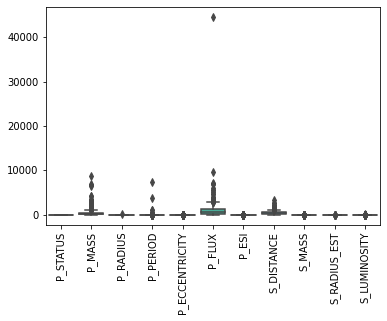

In [31]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=df)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical')

In [39]:
df['P_FLUX'].sort_values(ascending=False)

1303    44539.192000
329      9650.670400
266      7036.682500
1324     7007.960000
3671     6958.221500
            ...     
2206        0.308883
2137        0.298837
3811        0.272514
126         0.185638
15          0.000037
Name: P_FLUX, Length: 480, dtype: float64

In [41]:
df[df.P_FLUX == 44539.192000]

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,P_FLUX,P_ESI,S_DISTANCE,S_MASS,S_RADIUS_EST,S_LUMINOSITY,S_CONSTELLATION
1303,KELT-9 b,3.0,915.34465,21.19811,1.481124,0.0,44539.192,0.04401,205.65,2.52,2.36,53.382199,Cygnus


In [42]:
df.drop(labels=1303, inplace=True)

In [43]:
df[df.P_FLUX == 44539.192000]

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_PERIOD,P_ECCENTRICITY,P_FLUX,P_ESI,S_DISTANCE,S_MASS,S_RADIUS_EST,S_LUMINOSITY,S_CONSTELLATION


<AxesSubplot:>

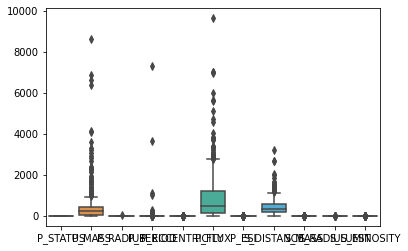

In [44]:
sns.boxplot(data=df)

In [61]:
fig, ax = plt.subplots(ncols=df.shape[1])
for i in range(df.shape[1]):
    ax[i] = sns.boxplot(data=df[df.columns[i]])

KeyError: 0